### FLAML tutorial by Hunaidkhan Pathan

In [ ]:
# !pip install flaml

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv",header = False)

In [3]:
df.columns = ["Number of times pregnant","Plasma glucose","Diastolic blood pressure","Triceps skin fold thickness","2-Hour serum insulin","bmi","Diabetes pedigree function","Age","C"]

In [4]:
df.columns

Index(['Number of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'bmi', 'Diabetes pedigree function', 'Age',
       'Class'],
      dtype='object')

In [5]:
df.shape

(768, 9)

In [33]:
df.isnull().sum()

Number of times pregnant       0
Plasma glucose                 0
Diastolic blood pressure       0
Triceps skin fold thickness    0
2-Hour serum insulin           0
bmi                            0
Diabetes pedigree function     0
Age                            0
Class                          0
dtype: int64

In [34]:
df.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,bmi,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.columns


Index(['Number of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'bmi', 'Diabetes pedigree function', 'Age',
       'Class'],
      dtype='object')

In [51]:
import seaborn as sns

C:\Users\phunaidkhanhabibk\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


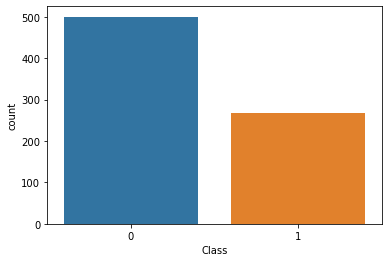

In [57]:
sns_plot =sns.countplot(df['Class'])
fig = sns_plot.get_figure()
fig.savefig("Class imbalance.png") 

### We can see that class is imbalanced

In [8]:
X = df.drop(['Class'], axis = 1)

In [9]:
X.columns

Index(['Number of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'bmi', 'Diabetes pedigree function', 'Age'],
      dtype='object')

In [10]:
y = df['Class']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [36]:
from flaml import AutoML
automl = AutoML()

In [37]:

settings = {
    "time_budget": 300,  # total running time in seconds
    "metric": 'f1',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
    "task": 'classification',  # task type    
    "log_file_name": 'diabetes_experiment.log',  # flaml log file
}

In [38]:

'''The main flaml automl API'''
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl: 06-17 11:36:15] {908} INFO - Evaluation method: cv
[flaml.automl: 06-17 11:36:15] {607} INFO - Using StratifiedKFold
[flaml.automl: 06-17 11:36:15] {929} INFO - Minimizing error metric: 1-f1
[flaml.automl: 06-17 11:36:15] {948} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'lrl1']
[flaml.automl: 06-17 11:36:15] {1012} INFO - iteration 0, current learner lgbm
[flaml.automl: 06-17 11:36:15] {1159} INFO -  at 0.2s,	best lgbm's error=0.9172,	best lgbm's error=0.9172
[flaml.automl: 06-17 11:36:15] {1012} INFO - iteration 1, current learner lgbm
[flaml.automl: 06-17 11:36:15] {1159} INFO -  at 0.2s,	best lgbm's error=0.9172,	best lgbm's error=0.9172
[flaml.automl: 06-17 11:36:15] {1012} INFO - iteration 2, current learner lgbm
[flaml.automl: 06-17 11:36:15] {1159} INFO -  at 0.3s,	best lgbm's error=0.4558,	best lgbm's error=0.4558
[flaml.automl: 06-17 11:36:15] {1012} INFO - iteration 3, current learner lgbm
[flaml.automl: 06-17 

In [39]:
''' retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 15.0, 'max_features': 0.6519975858389273, 'criterion': 'entropy'}
Best accuracy on validation data: 0.6803
Training duration of best run: 0.2943 s


In [40]:
automl.model

In [41]:
''' pickle and save the automl object '''
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

In [44]:
''' compute predictions of testing dataset ''' 
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred,'True labels', y_test)

y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels [0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 0 1 0 0 0 0] True labels 223    0
461    0
175    1
636    0
349    1
      ..
88     1
719    1
371    0
390    0
491    0
Name: Class, Length: 154, dtype: int64


In [45]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))
print('f1', '=', 1 - sklearn_metric_loss_score('f1', y_pred, y_test))

accuracy = 0.7532467532467533
roc_auc = 0.8089407191448008
log_loss = 0.7030296539200348
f1 = 0.6041666666666666


In [48]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, train_loss_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=120)

for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 614, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.1, 'subsample': 1.0, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.1, 'subsample': 1.0, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 614, 'Current Hyper-parameters': {'n_estimators': 4.0, 'num_leaves': 4.0, 'min_child_samples': 12.0, 'learning_rate': 0.2591253457286053, 'subsample': 0.9266743941610592, 'log_max_bin': 10.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0013933617380144255, 'reg_lambda': 0.1809691794829294}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4.0, 'num_leaves': 4.0, 'min_child_samples': 12.0, 'learning_rate': 0.2591253457286053, 

Training curve 

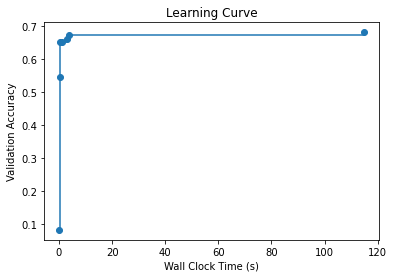

In [49]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()


In [50]:
from matplotlib import pyplot as plt

plt.savefig('training curve.png')

<Figure size 432x288 with 0 Axes>

References ,
https://github.com/microsoft/FLAML
https://machinelearningmastery.com/standard-machine-learning-datasets/
